# Chapter 6: Drawing Geometric Shapes and Fractals

## Programming Challenges

### \#4: Drawing the Mandelbrot Set

[matplotlib.axes.Axes.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html?highlight=imshow#matplotlib.axes.Axes.imshow) メソッドを利用して画像を表示

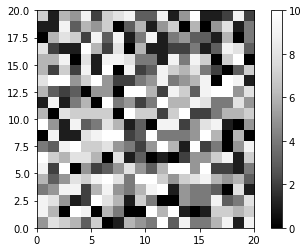

In [1]:
import random

import matplotlib.cm as cm
import matplotlib.pyplot as plt


def gen_image(x_p, y_p):
    return [[random.randint(0, 10) for _ in range(x_p)] for _ in range(y_p)]


x_p = 20
y_p = 20

fig, ax = plt.subplots()

data = gen_image(x_p, y_p)
image = ax.imshow(
    data,
    origin="lower",
    extent=(0, x_p, 0, y_p),
    cmap=cm.Greys_r,
    interpolation="nearest",
)
fig.colorbar(image, ax=ax)

plt.show()

マンデルブロ集合を描く

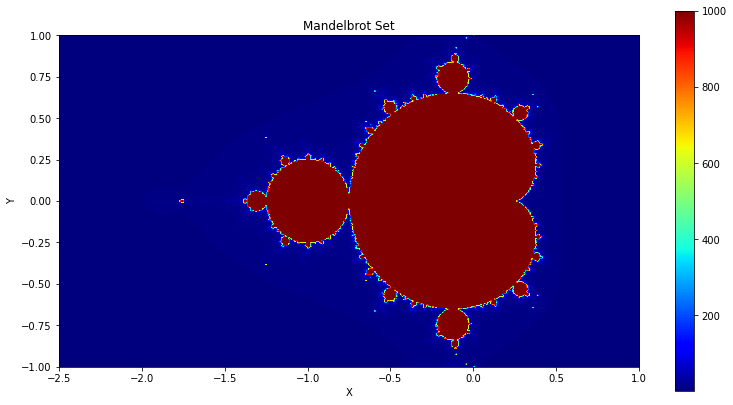

In [2]:
import random

import matplotlib.cm as cm
import matplotlib.pyplot as plt


def initialize_image(x_p, y_p):
    return [[0 for _ in range(x_p)] for _ in range(y_p)]


# Subset of the complex plane we are considering
x0, x1 = -2.5, 1
y0, y1 = -1, 1


def escape_time(x, y):
    # Maximum iterations
    max_iteration = 1000

    c = complex(x, y)

    z = complex(0, 0)
    iteration = 0
    while abs(z) < 2 and iteration < max_iteration:
        z = z ** 2 + c
        iteration += 1
    return iteration


def generate_mandelbrot():
    # Number of divisions along each axis
    n = 400

    data = initialize_image(n, n)

    # Generate a set of equally spaced points in the region
    # above
    dx = (x1 - x0) / (n - 1)
    dy = (y1 - y0) / (n - 1)
    x_coords = [x0 + i * dx for i in range(n)]
    y_coords = [y0 + i * dy for i in range(n)]

    for i, x in enumerate(x_coords):
        for k, y in enumerate(y_coords):
            data[k][i] = escape_time(x, y)

    return data


fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title("Mandelbrot Set")
ax.set_xlabel("X")
ax.set_ylabel("Y")

data = generate_mandelbrot()
image = ax.imshow(
    data,
    origin="lower",
    extent=(x0, x1, y0, y1),
    cmap=cm.jet,
)
fig.colorbar(image, ax=ax)

fig.savefig("chap6_pc4_drawing-the-mandelbrot-set.png")
plt.show()

エスケープの様子を眺めてみる。

まずは収束する場合

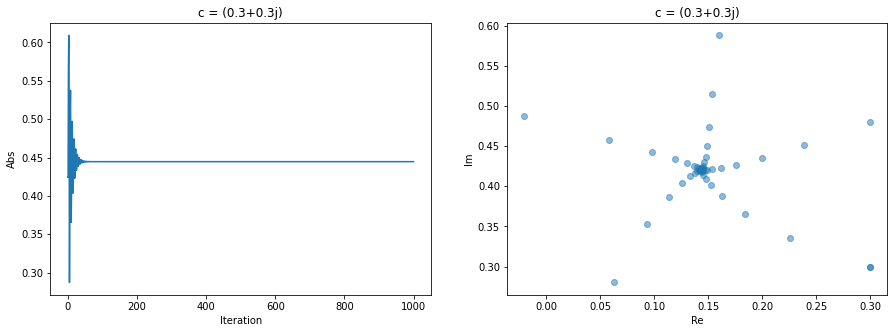

In [3]:
import matplotlib.pyplot as plt


def show_escape(c):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    z_x = [c.real]
    z_y = [c.imag]
    z_abs = [abs(c)]

    # Maximum iterations
    max_iteration = 1000

    z1 = complex(0, 0)
    iteration = 0
    while abs(z1) < 2 and iteration < max_iteration:
        z1 = z1 ** 2 + c
        z_x.append(z1.real)
        z_y.append(z1.imag)
        z_abs.append(abs(z1))
        iteration += 1

    axes[0].set_title("c = {0}".format(c))
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Abs")
    axes[0].plot(z_abs)
    axes[1].set_title("c = {0}".format(c))
    axes[1].set_xlabel("Re")
    axes[1].set_ylabel("Im")
    axes[1].scatter(z_x, z_y, alpha=0.5)

    fig.savefig(
        "chap6_pc4_drawing-the-mandelbrot-set-escape_c-{0}-{1}j.png".format(
            c.real, c.imag
        )
    )
    plt.show()


show_escape(complex(0.3, 0.3))

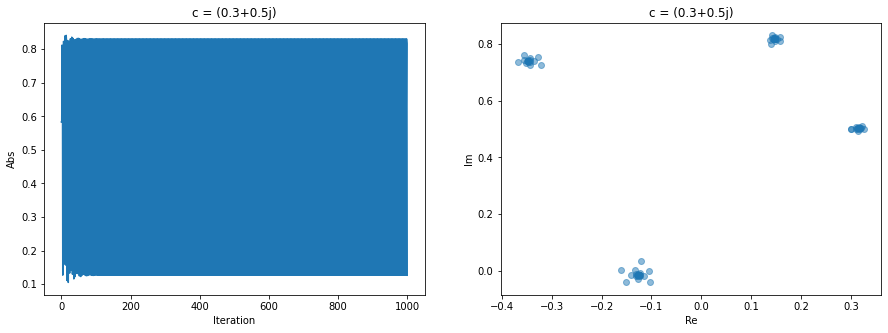

In [4]:
show_escape(complex(0.3, 0.5))

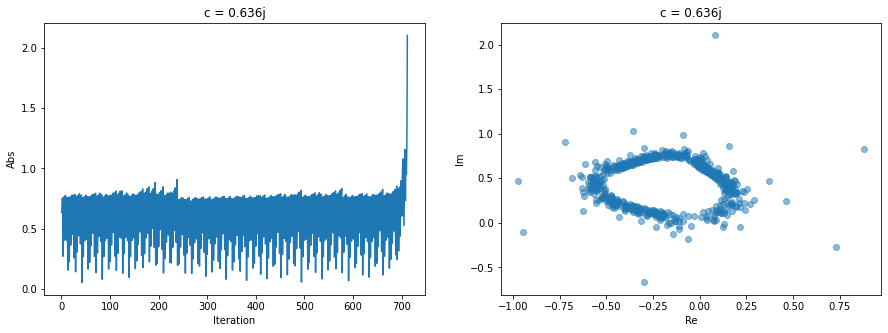

In [5]:
show_escape(complex(0, 0.636))

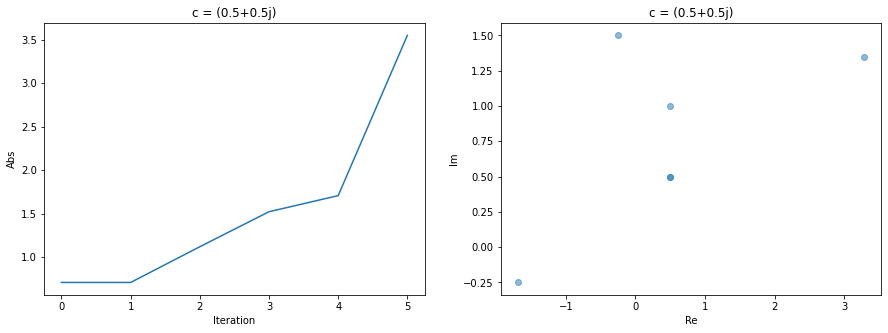

In [6]:
show_escape(complex(0.5, 0.5))